<a href="https://colab.research.google.com/github/mazhar75/Digital-Signal-Processing-Lab/blob/main/DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB1 & LAB2

In [1]:
import numpy as np
import matplotlib.pyplot as plt


**Creating np arrays with random number**

In [2]:
a=np.random.randint(1,100,(10))
a

array([62, 13,  8, 36, 31, 36, 18, 67, 57, 49])

**Sorting np arrays**

In [3]:
np.sort(a)

array([ 8, 13, 18, 31, 36, 36, 49, 57, 62, 67])

#LAB3

**Different types of signal**

1. DT periodic signal

<StemContainer object of 3 artists>

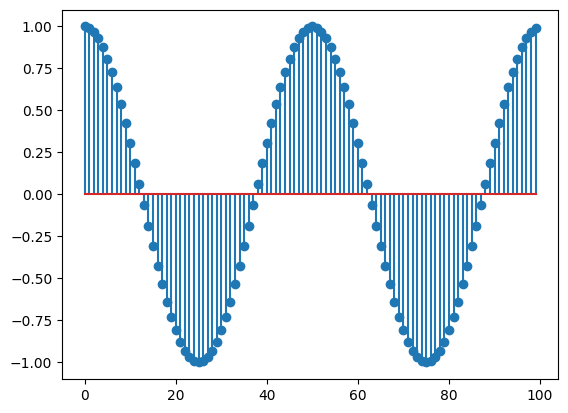

In [4]:
Fs=500
L=100
F=10
s=np.zeros(L)
for n in range (L):
  s[n]=np.cos(2*np.pi*n*F/Fs)
plt.stem(s)

2. Unit sequence

<StemContainer object of 3 artists>

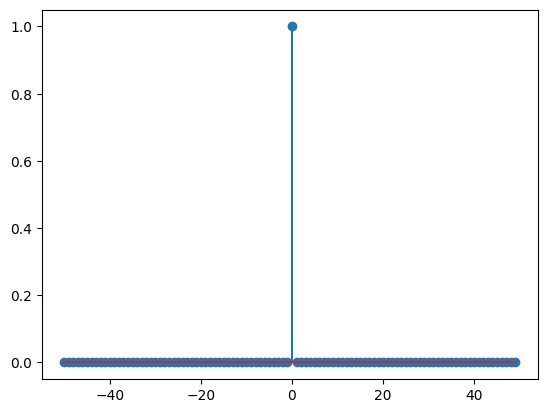

In [5]:
d=np.zeros(L)
d[L//2]=1
x=np.arange(-L//2,L//2)
plt.stem(x,d)

3. Unit step signal

<StemContainer object of 3 artists>

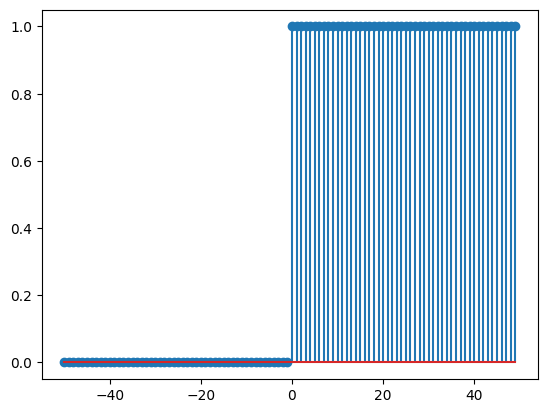

In [6]:
u=np.ones(L)
for i in range(L//2):
  u[i]=0;
plt.stem(x,u)

4.Unit ramp signal

<StemContainer object of 3 artists>

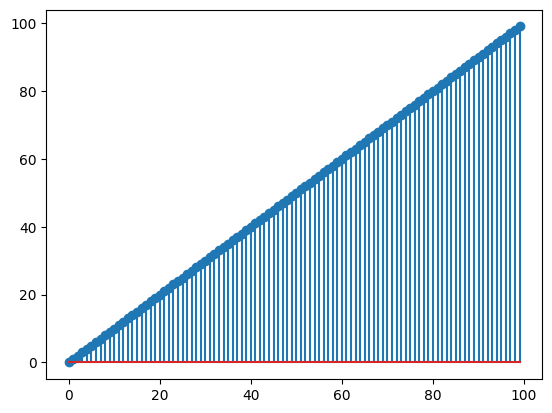

In [7]:
ur=np.zeros(L)
for n in range(L):
  ur[n]=n
plt.stem(ur)


5. Exponential signal

<StemContainer object of 3 artists>

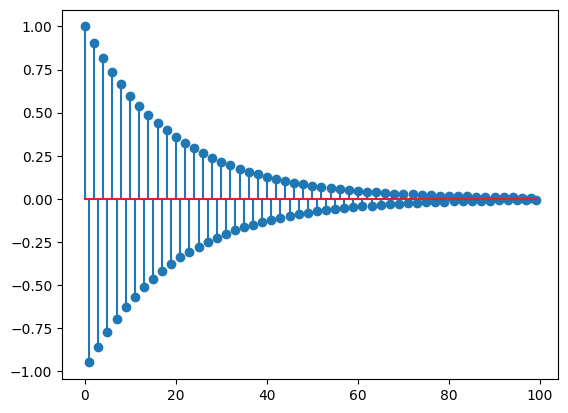

In [8]:
ur=np.zeros(L)
a=-0.95
for n in range (L):
   ur[n]=a**n
plt.stem(ur)

#LAB4

Generate a random signal

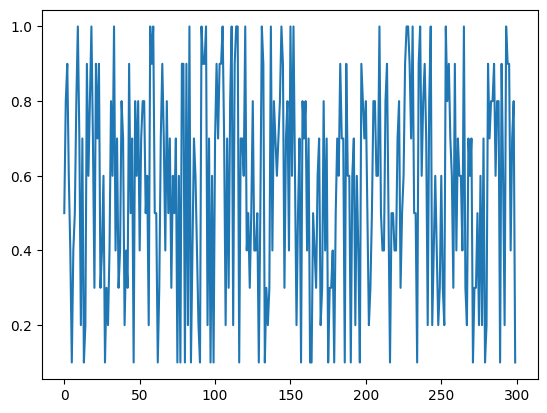

In [9]:
import random
x=[]
L=300
for n in range(L):
  r=random.randint(1,10)
  x.append(r)
x=np.divide(x,10)
plt.plot(x)

Applying moving average filter

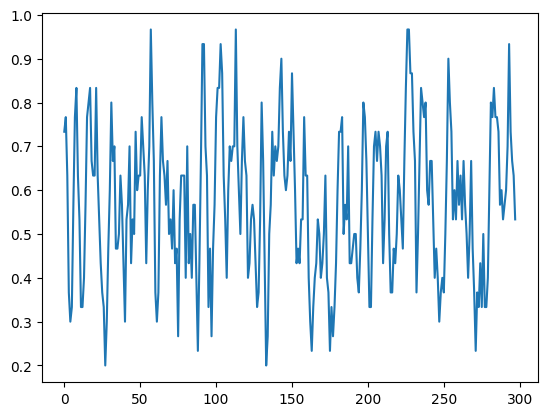

In [10]:
y=[]
for i in range(1,L-1):
  avg=(x[i-1]+x[i]+x[i+1])/3
  y.append(avg)
plt.plot(y)

Accumulator

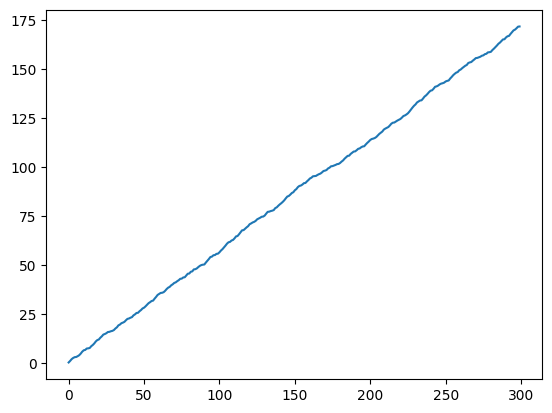

In [11]:
acc=[]
for n in range(L):
  acc.append(sum(x[0:n+1]))

plt.plot(acc)

First Order Difference

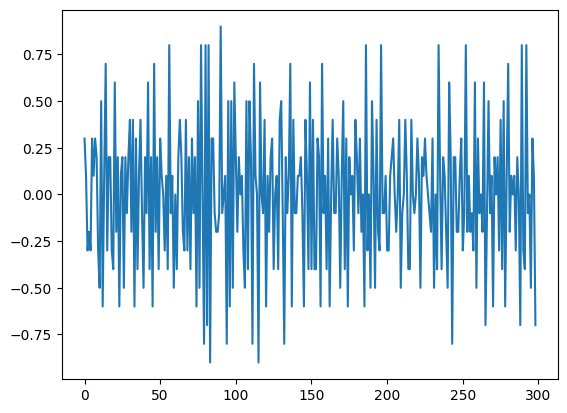

In [12]:
fod=[]
for i in range (1,L):
  fod.append(x[i]-x[i-1])
plt.plot(fod)

Moving Median filter

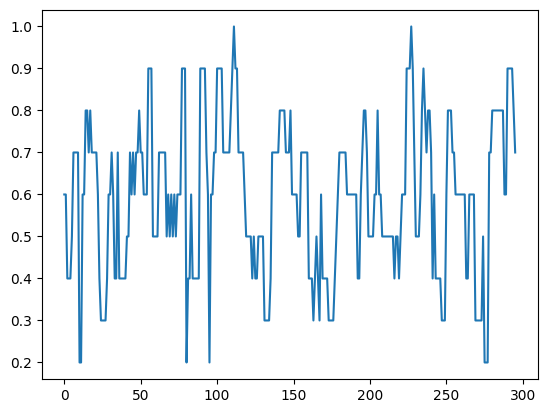

In [13]:
med=[]
for i in range(2,L-2):
  med.append(sorted([x[i-2],x[i-1],x[i],x[i+1],x[i+2]])[2])
plt.plot(med)

#LAB5

Convolutional Sum Ex:2.3.2

The impulse response of a linear time-invariant system is
h = {1,**2**,1, -1}

Determine the response of the system to the input signal
x(n)={**1**,2,3,1}

In [14]:
h=np.array([1,2,1,-1])
a=1
x=np.array([1,2,3,1])
b=0
h=np.flip(h)
n=len(h)
a=0
xx=np.zeros(n)
xx=np.concatenate([xx,x,xx])
b=2
con=[]
while(b<8):
  val=0
  for n in range (4):
    val+=h[n]*xx[b+n]
  b=b+1
  con.append(val)
b=1
fr=[]
while(b>0):
  val=0
  for n in range (4):
    val+=h[n]*xx[b+n]
  b=b-1
  fr.append(val)
fr.reverse()
for i in range (len(con)):
  fr.append(con[i])
print(fr)

[1.0, 4.0, 8.0, 8.0, 3.0, -2.0, -1.0]


Using Library Function

In [15]:
h=np.array([1,2,1,-1])
x=np.array([1,2,3,1])
con=np.convolve(h,x,mode="full")
con

array([ 1,  4,  8,  8,  3, -2, -1])

<ipython-input-16-70885d78844f>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, use_line_collection=True)
<ipython-input-16-70885d78844f>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h, use_line_collection=True)
<ipython-input-16-70885d78844f>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(con, use_line_collection=True)


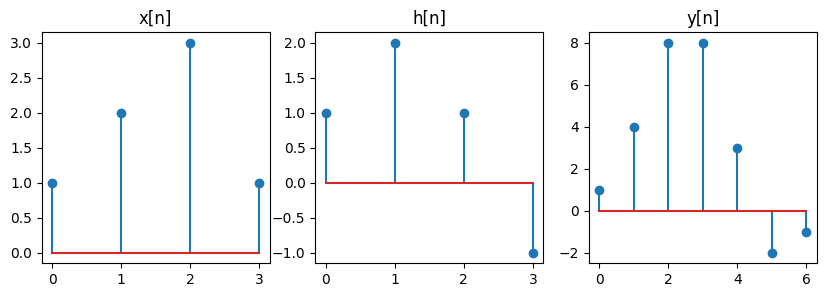

In [16]:
plt.figure(figsize=(10, 3))
plt.subplot(131)
plt.stem(x, use_line_collection=True)
plt.title('x[n]')
plt.subplot(132)
plt.stem(h, use_line_collection=True)
plt.title('h[n]')
plt.subplot(133)
plt.stem(con, use_line_collection=True)
plt.title('y[n]')
#plt.tight_layout()
plt.show()

#LAB6

Discrete Furier Transform

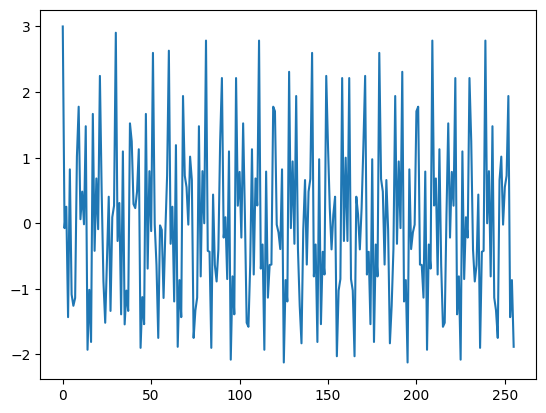

In [17]:
Fs=1000
f1=100
f2=120
f3=60
N=256
x=np.zeros(N)
for n in range (N):
  x[n]=np.cos(2*np.pi*f1*n/Fs)+np.cos(2*np.pi*f2*n/N)+np.cos(2*np.pi*f3*n/N)
plt.plot(x)


**DFT**

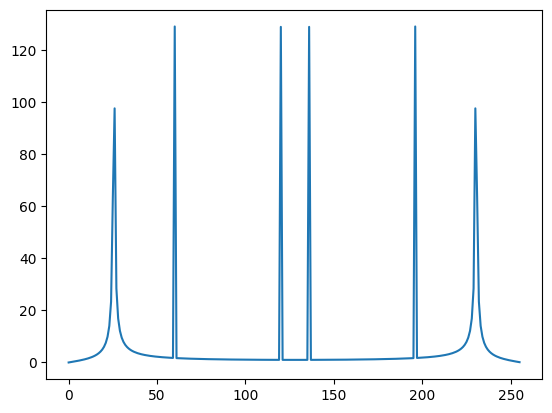

In [18]:
X=np.zeros(N,dtype="complex_")
for k in range (N):
  for n in range (N):
    X[k]=X[k]+x[n]*np.exp(-1j*2*np.pi*k*n/N)
plt.plot(abs(X))


**IDFT**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


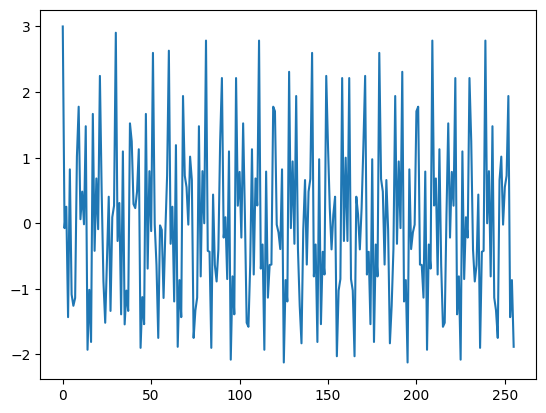

In [19]:
y=np.zeros(N,"complex_")
for n in range (N):
  for k in range (N):
    y[n]=y[n]+X[k]*np.exp(1j*2*np.pi*k*n/N)
  y[n]=y[n]/N
plt.plot(y)